# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## 1. Load Data

In [92]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/reviews.csv')

# Display general information about the dataset
df.info()

# Display the first few rows to understand the structure of the data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## 2. Data Exploration (Including Handling Missing Values)


Missing Values in Each Column:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64


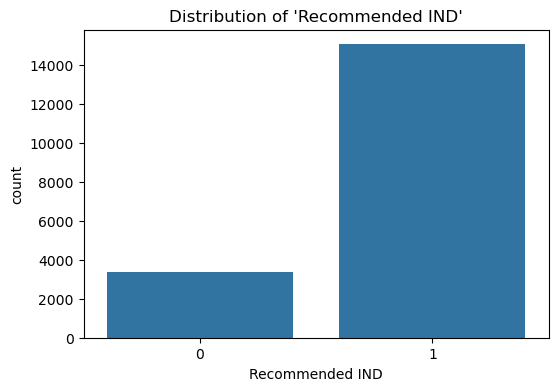


Statistical Summary of Numerical Features:
        Clothing ID           Age  Positive Feedback Count  Recommended IND
count  18442.000000  18442.000000             18442.000000     18442.000000
mean     954.896757     43.383635                 2.697484         0.816235
std      141.571783     12.246264                 5.942220         0.387303
min        2.000000     18.000000                 0.000000         0.000000
25%      863.000000     34.000000                 0.000000         1.000000
50%      952.000000     41.000000                 1.000000         1.000000
75%     1078.000000     52.000000                 3.000000         1.000000
max     1205.000000     99.000000               122.000000         1.000000

Class balance of 'Recommended IND':
Recommended IND
1    0.816235
0    0.183765
Name: proportion, dtype: float64


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values in each column
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)  # This will show missing data, if any

# Visualize the distribution of the target variable 'Recommended IND'
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended IND', data=df)
plt.title("Distribution of 'Recommended IND'")
plt.show()

# Display statistical summary of numerical features
print("\nStatistical Summary of Numerical Features:")
print(df.describe())

# Check for class imbalance in 'Recommended IND'
class_balance = df['Recommended IND'].value_counts(normalize=True)
print("\nClass balance of 'Recommended IND':")
print(class_balance)

# If missing values are present (though not in this case), apply an appropriate fill method
# Example: df.fillna(df.mean(), inplace=True) for numerical columns


## 3. Data Preprocessing (Feature Engineering)

In [98]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Recommended IND', axis=1)
y = df['Recommended IND']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)

# Check the shape of 'Review Text' column to ensure it's suitable for text analysis
print("Review Text shape:", X_train['Review Text'].shape)


Review Text shape: (16597,)


## 4. Text Preprocessing and Feature Transformation

In [101]:
# Use TfidfVectorizer to convert text data into numerical features
text_features = ['Review Text']
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit number of features for efficiency

# Apply transformation to text features
X_text_train = tfidf.fit_transform(X_train[text_features].values.ravel())  # Ensure the column is 1D

# Check the transformed text data shape
print("Text transformed shape:", X_text_train.shape)

# Convert the sparse matrix to a dense matrix for further processing
X_text_dense = X_text_train.toarray()


Text transformed shape: (16597, 5000)


## 5. Numerical and Categorical Feature Transformation

In [104]:
# Transform numerical features (Age, Positive Feedback Count)
numeric_features = ['Age', 'Positive Feedback Count']
numeric_transformer = StandardScaler()

# Apply transformation to numerical features
X_numeric_train = numeric_transformer.fit_transform(X_train[numeric_features])

# Transform categorical features (Clothing ID, Title, Division Name, etc.)
categorical_features = ['Clothing ID', 'Title', 'Division Name', 'Department Name', 'Class Name']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use drop='first' to avoid multicollinearity

X_categorical_train = encoder.fit_transform(X_train[categorical_features])

# Check the shapes of the transformed features
print("Numeric transformed shape:", X_numeric_train.shape)
print("Categorical transformed shape:", X_categorical_train.shape)

# Combine the transformed numeric, categorical, and text features
X_train_final = np.hstack([X_numeric_train, X_categorical_train, X_text_dense])

# Ensure X_train_final and y_train have the same number of samples
print("Combined transformed feature matrix shape:", X_train_final.shape)


Numeric transformed shape: (16597, 2)
Categorical transformed shape: (16597, 12492)
Combined transformed feature matrix shape: (16597, 17494)


## 6. Model Training and Evaluation

Training accuracy: 0.9458


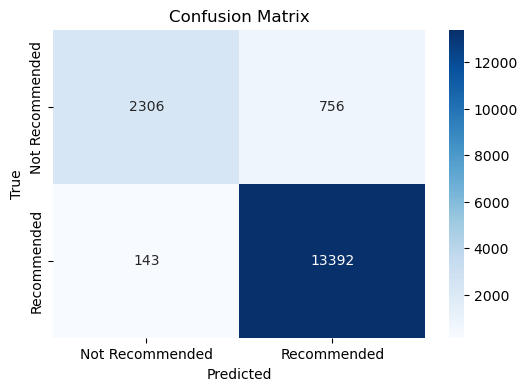


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.84      3062
           1       0.95      0.99      0.97     13535

    accuracy                           0.95     16597
   macro avg       0.94      0.87      0.90     16597
weighted avg       0.95      0.95      0.94     16597



In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear')  # Use solver='liblinear' for small datasets or binary classification
model.fit(X_train_final, y_train)

# Evaluate the model's accuracy on the training data
y_train_pred = model.predict(X_train_final)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {accuracy:.4f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print classification report for detailed performance metrics
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))


## 7. Hyperparameter Tuning and Model Fine-Tuning

In [190]:
# Make sure X_train_subset and y_train_subset are defined
X_train_subset = X_train.iloc[:1000]  # For example, selecting the first 1000 samples
y_train_subset = y_train.iloc[:1000]  # Corresponding labels

# Create the pipeline
pipeline = Pipeline([
    ('text', TfidfVectorizer(stop_words='english', max_features=5000)),  # Text processing
    ('standardscaler', StandardScaler(with_mean=False)),  # Scale numeric features
    ('logisticregression', LogisticRegression(max_iter=2000))  # Increase max_iter even more
])

# Define the hyperparameter search space
param_dist = {
    'logisticregression__solver': ['sag', 'lbfgs'],  # Keep 'sag' and 'lbfgs' as solvers
    'logisticregression__C': np.logspace(0, 5, 6),  # New C range from 1 to 100000
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=pipeline, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs=-1)

# Fit the model using the subset data
random_search.fit(X_train_subset['Review Text'], y_train_subset)

# Output the best parameters and cross-validation score
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'logisticregression__solver': 'lbfgs', 'logisticregression__C': 10.0}
Best cross-validation score: 0.8439996883110655


## 8. Advanced NLP: Sentiment Analysis 

                                         Review Text  sentiment
0  I had such high hopes for this dress and reall...   0.073675
1  I love, love, love this jumpsuit. it's fun, fl...   0.550000
2  This shirt is very flattering to all due to th...   0.512891
3  I love tracy reese dresses, but this one is no...   0.178750
4  I aded this in my basket at hte last mintue to...   0.133750


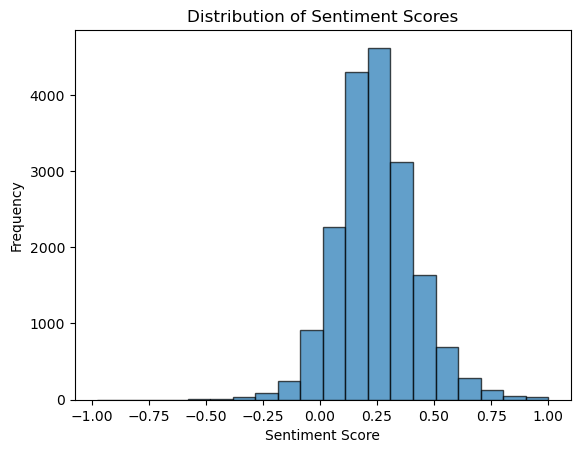

                                         Review Text  sentiment  \
0  I had such high hopes for this dress and reall...   0.073675   
1  I love, love, love this jumpsuit. it's fun, fl...   0.550000   
2  This shirt is very flattering to all due to th...   0.512891   
3  I love tracy reese dresses, but this one is no...   0.178750   
4  I aded this in my basket at hte last mintue to...   0.133750   

  sentiment_label  
0         Neutral  
1        Positive  
2        Positive  
3         Neutral  
4         Neutral  


In [193]:
from textblob import TextBlob

# Define a function to apply sentiment analysis
def sentiment_analysis(text):
    try:
        # Create a TextBlob object
        blob = TextBlob(text)
        # Return the sentiment polarity (-1 to 1)
        return blob.sentiment.polarity
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

# Apply sentiment analysis to the 'Review Text' column of the DataFrame
df['sentiment'] = df['Review Text'].apply(sentiment_analysis)

# Check the output
print(df[['Review Text', 'sentiment']].head())

import matplotlib.pyplot as plt

# Plot the bar chart of Distribution of Sentiment Scores
plt.hist(df['sentiment'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

def classify_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification to the sentiment column
df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

# View the updated DataFrame
print(df[['Review Text', 'sentiment', 'sentiment_label']].head())


## 9. Final Model Evaluation on Test Set

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # 假设你用的是随机森林模型
from sklearn.model_selection import train_test_split

# 提取文本列（假设文本列的名称是 'Review Text'）
text_column = 'Review Text'

# 创建 TF-IDF 向量化器
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # 只保留最常见的 1000 个词

# 创建数值数据处理器（例如，标准化 'Age' 和 'Clothing ID'）
numeric_columns = ['Clothing ID', 'Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 填充缺失值
    ('scaler', StandardScaler())  # 标准化数值数据
])

# 将文本列和数值列组合成一个预处理步骤
preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf_vectorizer, text_column),
        ('num', numeric_transformer, numeric_columns)
    ])

# 创建一个包含预处理和分类器的 pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# 拆分数据集（假设你已经有了 X 和 y 数据）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model_pipeline.fit(X_train, y_train)

# 预测
y_pred = model_pipeline.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 假设是二分类任务
recall = recall_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.8538899430740038
Precision: 0.8570598489250436
Recall: 0.9843176509843177


In [222]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1-score: {f1}")


F1-score: 0.9162913495884454
